## **DÍAS FESTIVOS:** DEMANDA Y TEMPERATURA

#### **1) Importamos libreria útiles:**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
maxScatter = 3000

#### **2) Cargamos datos:**

- Comprobamos que trabajamos en el directorio correcto y cargamos datos de carpeta "data":

In [2]:
dir = os.getcwd()
DIR = dir
print('Current working directory:', os.getcwd())


# Nos guardamos los datos que queremos en un dataframe usando pandas
dataframe = pd.read_csv('..\data\G02_DATOS_DEM_G1.csv', sep=',', verbose=True)
dataframe.FECHA = pd.to_datetime(dataframe.FECHA, format='%d/%m/%Y')
dataframe

Current working directory: c:\Users\serov\Documents\GitHub\TRABAJO-1-ESTADISTICA-DESCRIPTIVA\notebooks
Tokenization took: 1.00 ms
Type conversion took: 2.00 ms
Parser memory cleanup took: 0.00 ms


,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,2014,1,1,4
1,2014-01-02,848.520000,17.900000,8.300000,0,2014,1,2,5
2,2014-01-03,842.250000,18.000000,10.800000,0,2014,1,3,6
3,2014-01-04,790.870000,14.800000,9.900000,0,2014,1,4,7
4,2014-01-05,765.880000,15.500000,8.300000,0,2014,1,5,1
...,...,...,...,...,...,...,...,...,...
2950,2022-01-29,897.963540,14.928054,7.128469,0,2022,1,29,7
2951,2022-01-30,883.656025,14.921389,7.131950,0,2022,1,30,1
2952,2022-01-31,1016.937007,14.914723,7.135431,0,2022,1,31,2
2953,2022-02-01,1014.929731,14.908058,7.138912,0,2022,2,1,3


#### **3) ¿Cuántos días festivos hay?**

- Creamos un gráfico en el que se compare el número de días festivos con el número de días no-festivos:

Text(0, 0.5, 'número de días')

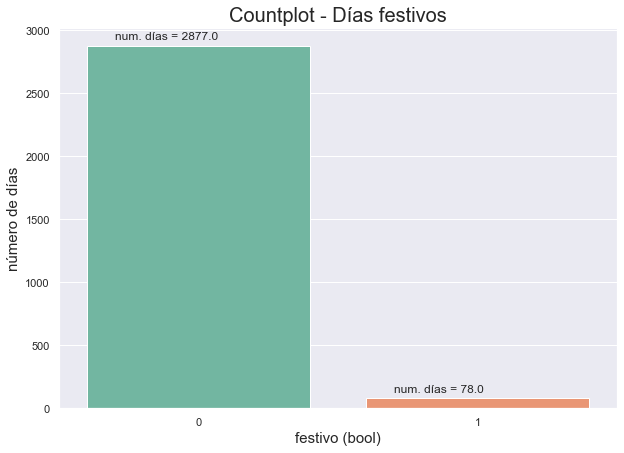

In [3]:
fig = plt.figure(1, figsize=(10, 7))

DF_countplot = sns.countplot(x='FEST', data=dataframe, palette="Set2")

for patch in DF_countplot.patches:
    DF_countplot.annotate('num. días = {:.1f}'.format(patch.get_height()), (patch.get_x()+0.1, patch.get_height()+50))

plt.title("Countplot - Días festivos", fontsize = 20)
plt.xlabel("festivo (bool)", fontsize = 15)
plt.ylabel("número de días", fontsize = 15)

In [4]:
# Calculamos el porcentaje de días festivos:
pc_dfest = 78*100/2955
print(f'Porcentaje de días festivos = {pc_dfest}%')

Porcentaje de días festivos = 2.6395939086294415%


    La gran minoría de días son festivos. Solo 78 de los 2955 son festivos, aproximadamente un 2.64% de los días.

#### **4) ¿Hay mayor demanda energética en días festivos?**

- Creamos dos dataframes, uno para los días festivos y otro para los no festivos:

In [5]:
dataframe_dias_no_festivos = dataframe[dataframe['FEST'] == 0]
dataframe_dias_festivos = dataframe[dataframe['FEST'] == 1]

- Realizamos una breve descripción de ambos para comparar medias

In [6]:
dataframe_dias_no_festivos.describe(include=[float])

,DEM,TMAX,TMIN
count,2877.000000,2877.000000,2877.000000
mean,748.448778,21.400516,13.683371
std,173.266813,5.709569,6.267783
min,419.120000,7.200000,-0.700000
25%,615.030000,16.600000,8.300000
50%,702.116444,20.800000,13.100000
75%,886.240000,26.500000,19.200000
max,1298.008083,37.000000,27.300000


In [7]:
dataframe_dias_festivos.describe(include=[float])

,DEM,TMAX,TMIN
count,78.000000,78.000000,78.000000
mean,684.675096,19.096154,11.078205
std,147.148410,4.855535,5.167120
min,448.790000,8.500000,1.800000
25%,573.695000,16.125000,7.050000
50%,663.110000,17.950000,10.050000
75%,793.355000,21.950000,13.375000
max,1050.360000,30.000000,24.600000


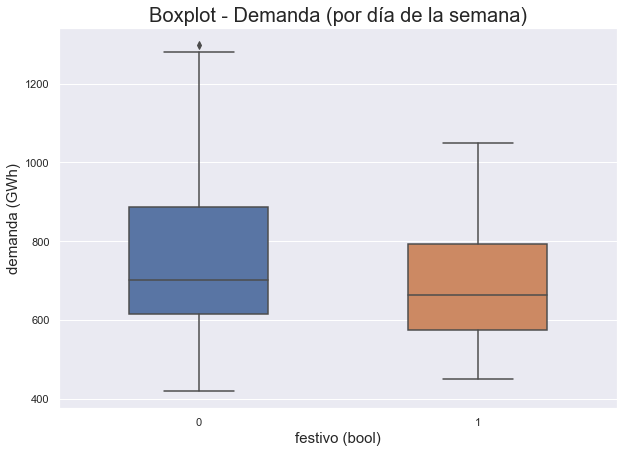

In [8]:
# DEMANDA / DIASEM
fig = plt.figure(2, figsize=(10,7))

DEM_boxplot_diasem = sns.boxplot(y='DEM', x='FEST', 
                 data=dataframe, 
                 width=0.5)

plt.title("Boxplot - Demanda (por día de la semana)", fontsize = 20)
plt.xlabel("festivo (bool)", fontsize = 15)
plt.ylabel("demanda (GWh)", fontsize = 15)
plt.show()

    En días festivos el promedio de la demanda, temperatura máxima y mínima es menor que en días no festivos

#### **5) ¿Se deben los resultados del apartado 4) a una casualidad?**

##### **5.1) ¿En qué meses caen los días festivos?**

Text(0, 0.5, 'número de días')

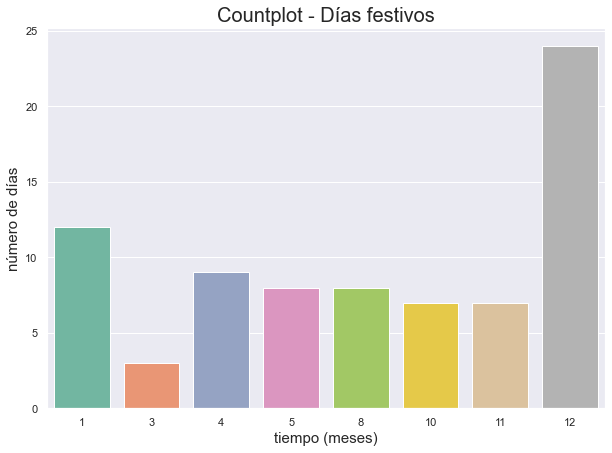

In [9]:
fig = plt.figure(3, figsize=(10, 7))

DF_meses_countplot = sns.countplot(x='MES', data=dataframe_dias_festivos, palette="Set2")

plt.title("Countplot - Días festivos", fontsize = 20)
plt.xlabel("tiempo (meses)", fontsize = 15)
plt.ylabel("número de días", fontsize = 15)

    La mayoría de días festivos coincide con vacaciones. ¿Hay en vacaciones un menor consumo energético?

##### **5.2) ¿Tiene que esto alguna relación con el mundo laboral?**

- Para estudiar esto consideremos que el trabajador promedio en España (lugar sobre el que se realiza el estudio), trabaja de lunes a viernes. Por esta consideración, sábado y domingo serían "días festivos". Creamos entonces un dataframe que incluya días festivos junto a sábados y domingos.

In [10]:
dataframe_sab_dom = dataframe[dataframe['DIASEM'] >= 6]

# Unimos con días festivos
dataframe_no_laborales = pd.concat([dataframe_dias_festivos, dataframe_sab_dom]).sort_values(by='FECHA')
# Quitamos duplicados
dataframe_no_laborales = dataframe_no_laborales.drop_duplicates()
dataframe_no_laborales

,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,2014,1,1,4
2,2014-01-03,842.250000,18.000000,10.800000,0,2014,1,3,6
3,2014-01-04,790.870000,14.800000,9.900000,0,2014,1,4,7
5,2014-01-06,739.130000,16.300000,8.900000,1,2014,1,6,2
9,2014-01-10,974.750000,13.000000,9.100000,0,2014,1,10,6
...,...,...,...,...,...,...,...,...,...
2936,2022-01-15,972.189305,13.700000,1.300000,0,2022,1,15,7
2942,2022-01-21,1102.162089,11.400000,3.400000,0,2022,1,21,6
2943,2022-01-22,968.494797,12.500000,2.100000,0,2022,1,22,7
2949,2022-01-28,1035.004033,14.934720,7.124987,0,2022,1,28,6


- Y comparamos con los días laborales:

In [11]:
dataframe_laborales = dataframe[dataframe['FECHA'].isin(dataframe_no_laborales['FECHA']) == False]
dataframe_laborales

,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
1,2014-01-02,848.520000,17.900000,8.300000,0,2014,1,2,5
4,2014-01-05,765.880000,15.500000,8.300000,0,2014,1,5,1
6,2014-01-07,893.450000,16.800000,8.300000,0,2014,1,7,3
7,2014-01-08,929.900000,15.300000,7.300000,0,2014,1,8,4
8,2014-01-09,961.710000,12.900000,5.400000,0,2014,1,9,5
...,...,...,...,...,...,...,...,...,...
2948,2022-01-27,1074.717370,14.941385,7.121506,0,2022,1,27,5
2951,2022-01-30,883.656025,14.921389,7.131950,0,2022,1,30,1
2952,2022-01-31,1016.937007,14.914723,7.135431,0,2022,1,31,2
2953,2022-02-01,1014.929731,14.908058,7.138912,0,2022,2,1,3


In [12]:
dataframe_laborales.describe(include=float)

,DEM,TMAX,TMIN
count,2062.000000,2062.000000,2062.000000
mean,760.112183,21.386924,13.703733
std,174.765591,5.695752,6.238373
min,419.120000,7.200000,-0.600000
25%,626.620000,16.600000,8.325000
50%,708.656553,20.700000,13.000000
75%,900.945000,26.500000,19.200000
max,1298.008083,36.600000,27.300000


In [13]:
dataframe_no_laborales.describe(include=float)

,DEM,TMAX,TMIN
count,893.000000,893.000000,893.000000
mean,715.946775,21.230623,13.408803
std,164.551984,5.711342,6.290114
min,439.640000,7.400000,-0.700000
25%,584.834436,16.400000,8.200000
50%,677.120000,20.600000,12.900000
75%,836.830000,26.100000,19.000000
max,1281.098084,37.000000,27.200000


    Las temperaturas en días no laborales se mantienen similares como era de esperar, pero la demanda es cierto que baja casi un 6% del promedio en días laborales.

- Para confirmar esto, ignorando los días festivos (minoría), veamos cómo se distribuyen las demandas en cada día de la semana:

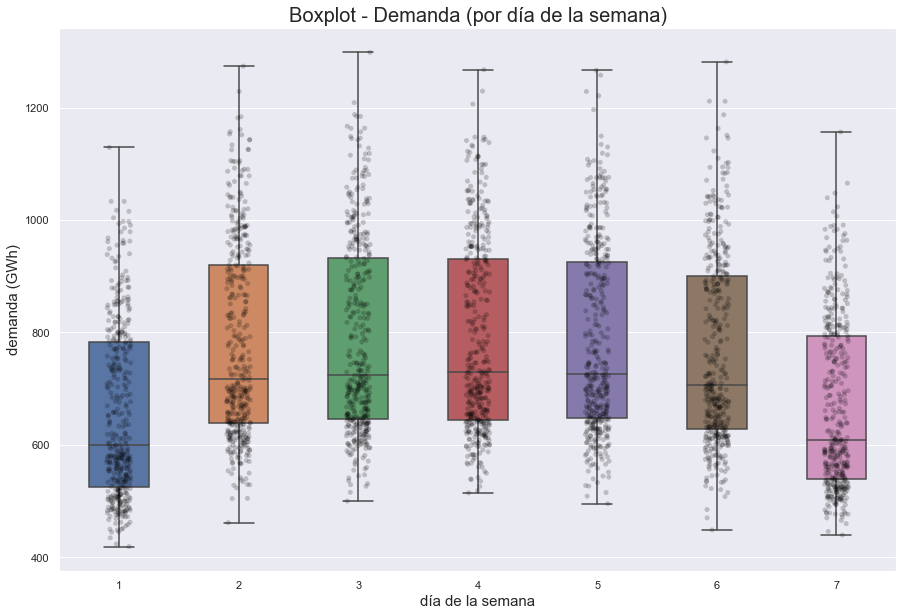

In [14]:
# DEMANDA / DIASEM
fig = plt.figure(4, figsize=(15,10))

DEM_boxplot_diasem = sns.boxplot(y='DEM', x='DIASEM', 
                 data=dataframe, 
                 width=0.5)

if(len(dataframe) <= maxScatter):
    DEM_boxplot_diasem=sns.stripplot(y='DEM', x='DIASEM', 
                       data=dataframe, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black')

plt.title("Boxplot - Demanda (por día de la semana)", fontsize = 20)
plt.xlabel("día de la semana", fontsize = 15)
plt.ylabel("demanda (GWh)", fontsize = 15)
plt.show()

    A excepción del lunes, domingos y sábados son los días de la semana que menores demandas se alcanzan, pero no lo suficiente como para asegurar que se debe a que son días no laborales.